[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/02.regression/ignore.ipynb)

This code is just meant to produce some figures

In [0]:
import pandas as pd # For dataframes (tables)
import numpy as np
import matplotlib.pyplot as plt # For plots
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



In [0]:
dataset_to_use = 'B1'

Download the dataset on this virtual machine

In [3]:
mydatasets_folder = "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/"
filename = "df."+ dataset_to_use+"_2.csv"
complete_name = mydatasets_folder+filename
!wget $complete_name



--2020-03-03 17:44:26--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.B1_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58556 (57K) [text/plain]
Saving to: ‘df.B1_2.csv.2’

df.B1_2.csv.2       100%[===================>]  57.18K  --.-KB/s    in 0.01s   

2020-03-03 17:44:26 (3.77 MB/s) - ‘df.B1_2.csv.2’ saved [58556/58556]



In [4]:
df = pd.read_csv(filename)

df=df.rename(columns={'label_num':'Resolution'})
df.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,IPSrc1,IPDst1,Protocol1,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,IPSrc2,IPDst2,Protocol2,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,IPSrc3,IPDst3,Protocol3,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,IPSrc4,IPDst4,Protocol4,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,...,IPDst23,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,IPSrc24,IPDst24,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,IPSrc25,IPDst25,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,label,Resolution,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
0,4.0,6,31,1668,36199,192.168.1.15,74.125.0.41,QUIC,2,26,142,35887,192.168.1.15,172.217.12.131,0,0,0,0,0,192.168.1.15,172.217.6.238,QUIC,4,3,1526,228,192.168.1.15,172.217.10.99,0,0,0,0,0,192.168.1.15,172.217.6.206,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533510002227,1533509999087,0.018835,668.101,10.241165,0.015357,True,36.199,q360p,360,3.589031,1.945910,3.465736,7.419980,10.496814,0.015240
1,3.8,10,58,1935,77605,192.168.1.15,173.194.31.91,QUIC,5,55,350,76070,192.168.1.15,172.217.11.35,0,0,0,0,0,192.168.1.15,172.217.12.174,QUIC,2,0,1194,0,192.168.1.15,172.217.10.131,0,0,0,0,0,192.168.1.15,172.217.10.35,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533525435993,1533525433168,0.034220,630.861,4.446780,0.007103,True,77.605,q144p,144,4.351632,2.397895,4.077537,7.568379,11.259400,0.007078
2,3.6,14,62,2842,75432,192.168.1.15,173.194.131.41,QUIC,7,54,1114,73156,192.168.1.15,172.217.10.131,0,0,0,0,0,192.168.1.15,172.217.3.110,QUIC,2,0,1225,0,192.168.1.15,172.217.12.131,0,0,0,0,0,192.168.1.15,172.217.10.226,QUIC,1,0,239,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,4,8,264,2276,0,0,1,0,1533528678493,1533528675472,0.031220,617.801,3.989780,0.006509,True,75.432,q144p,144,4.323232,2.708050,4.143135,7.952615,11.231000,0.006487
3,3.7,33,205,3569,278065,192.168.1.15,173.194.31.91,QUIC,16,168,1135,232222,192.168.1.15,172.217.12.131,0,0,0,0,0,192.168.1.15,172.217.10.129,QUIC,13,33,923,45553,192.168.1.15,172.217.7.14,QUIC,3,3,1273,228,192.168.1.15,172.217.12.214,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533509350705,1533509347355,0.019538,630.861,3.700462,0.005897,True,278.065,q360p,360,5.627855,3.526361,5.327876,8.180321,12.535614,0.005879
4,3.6,6,20,2036,27840,192.168.1.15,74.125.0.24,QUIC,4,20,846,27840,192.168.1.15,172.217.7.3,0,0,0,0,0,192.168.1.15,216.58.219.206,QUIC,2,0,1190,0,192.168.1.15,172.217.12.195,0,0,0,0,0,192.168.1.15,173.194.135.102,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533508048936,1533508045817,0.028220,634.601,4.512780,0.007156,True,27.840,q360p,360,3.326474,1.945910,3.044522,7.619233,10.234265,0.007130


In [5]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_test.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,IPSrc1,IPDst1,Protocol1,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,IPSrc2,IPDst2,Protocol2,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,IPSrc3,IPDst3,Protocol3,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,IPSrc4,IPDst4,Protocol4,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,...,IPDst23,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,IPSrc24,IPDst24,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,IPSrc25,IPDst25,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,label,Resolution,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
38,4.9,38,320,3977,439231,192.168.1.15,173.194.61.41,QUIC,34,316,2440,438943,192.168.1.15,172.217.10.35,0,0,0,0,0,192.168.1.15,172.217.10.238,QUIC,3,3,1298,226,192.168.1.15,172.217.12.131,0,0,0,0,0,192.168.1.15,23.78.208.56,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533491560158,1533491556102,0.017419,617.801,10.117581,0.016405,True,439.231,q1080p,1080,6.085025,3.663562,5.771441,8.288534,12.992783,0.016272
10,3.7,10,62,2313,82685,192.168.1.15,173.194.185.106,QUIC,8,61,1132,82623,192.168.1.15,172.217.12.195,0,0,0,0,0,192.168.1.15,172.217.12.174,QUIC,2,1,1181,62,192.168.1.15,172.217.12.131,0,0,0,0,0,192.168.1.15,172.217.10.131,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533530301275,1533530298249,0.026220,734.161,8.554780,0.011688,True,82.685,q480p,480,4.415038,2.397895,4.143135,7.746733,11.322806,0.011620
20,3.6,6,57,1675,79344,192.168.1.15,173.194.185.106,QUIC,3,57,210,79344,192.168.1.15,172.217.12.195,0,0,0,0,0,192.168.1.15,172.217.11.14,QUIC,2,0,1226,0,192.168.1.15,216.58.219.238,0,0,0,0,0,192.168.1.15,172.217.6.226,QUIC,1,0,239,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533526084992,1533526082144,0.027220,668.101,4.173780,0.006288,True,79.344,q144p,144,4.373793,1.945910,4.060443,7.424165,11.281561,0.006268
9,3.7,23,133,2200,181476,192.168.1.15,173.194.61.76,QUIC,9,88,1199,122496,192.168.1.15,172.217.10.129,QUIC,13,44,923,58917,192.168.1.15,172.217.10.35,0,0,0,0,0,192.168.1.15,216.58.219.206,QUIC,0,1,0,63,192.168.1.15,172.217.12.214,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,1,0,78,0,0,0,1,0,1533519911296,1533519907950,0.023268,567.861,5.314732,0.009400,True,181.476,q240p,240,5.201123,3.178054,4.897840,7.696667,12.108884,0.009356
11,2.9,12,80,1877,110420,192.168.1.15,173.194.61.72,QUIC,9,80,630,110420,192.168.1.15,172.217.10.131,0,0,0,0,0,192.168.1.15,172.217.11.14,QUIC,2,0,1160,0,192.168.1.15,172.217.10.118,0,0,0,0,0,192.168.1.15,172.217.10.35,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,1,0,87,0,0,0,1,0,1533506746202,1533506743833,0.031220,561.621,4.189780,0.007516,True,110.420,q360p,360,4.704291,2.564949,4.394449,7.537963,11.612056,0.007488


Let's split the dataset in 80% training set, 20% test set.

Try to run the code above multiple times.

What do you observe? Is it a problem? How do you solve it?

To achieve reproducibility, set the seed

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=3)
df_test.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,IPSrc1,IPDst1,Protocol1,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,IPSrc2,IPDst2,Protocol2,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,IPSrc3,IPDst3,Protocol3,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,IPSrc4,IPDst4,Protocol4,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,...,IPDst23,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,IPSrc24,IPDst24,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,IPSrc25,IPDst25,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,label,Resolution,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
35,3.4,14,80,3265,105883,192.168.1.15,74.125.0.24,QUIC,10,77,1935,105657,192.168.1.15,172.217.12.131,0,0,0,0,0,192.168.1.15,172.217.15.78,QUIC,3,3,1252,226,192.168.1.15,172.217.10.42,0,0,0,0,0,192.168.1.15,173.194.166.170,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,1,0,78,0,0,0,1,0,1533524139572,1533524136632,0.032220,634.601,4.508780,0.007156,True,105.883,q144p,144,4.662335,2.708050,4.394449,8.091321,11.570099,0.007130
44,4.0,3,23,1465,32016,192.168.1.15,173.194.31.73,QUIC,0,23,0,32016,192.168.1.15,172.217.7.3,0,0,0,0,0,192.168.1.15,172.217.12.195,0,0,0,0,0,192.168.1.15,172.217.10.46,QUIC,2,0,1226,0,192.168.1.15,172.217.6.214,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533487548108,1533487544967,0.073210,501.021,4.130790,0.008391,True,32.016,q1080p,1080,3.466236,1.386294,3.178054,7.290293,10.374022,0.008356
18,3.0,17,115,1219,156130,192.168.1.15,173.194.31.120,QUIC,16,112,1149,155904,192.168.1.15,172.217.15.67,0,0,0,0,0,192.168.1.15,172.217.7.3,0,0,0,0,0,192.168.1.15,172.217.6.246,0,0,0,0,0,192.168.1.15,172.217.10.46,QUIC,1,3,70,226,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533485534552,1533485531055,0.030832,561.621,4.940168,0.008851,True,156.130,q1080p,1080,5.050689,2.890372,4.753590,7.106606,11.958451,0.008812
23,6.4,37,359,2651,495118,192.168.1.15,74.125.0.24,QUIC,35,356,2511,494880,192.168.1.15,172.217.12.195,0,0,0,0,0,192.168.1.15,172.217.12.206,QUIC,2,3,140,238,192.168.1.15,172.217.7.3,0,0,0,0,0,192.168.1.15,172.217.10.142,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533486865237,1533486860167,0.095467,634.601,8.404533,0.013394,True,495.118,q1080p,1080,6.204796,3.637586,5.886104,7.883069,13.112553,0.013305
27,3.8,13,87,936,119179,192.168.1.15,173.194.31.73,QUIC,13,86,936,119093,192.168.1.15,172.217.7.3,0,0,0,0,0,192.168.1.15,172.217.11.46,0,0,0,0,0,192.168.1.15,172.217.12.131,0,0,0,0,0,192.168.1.15,172.217.11.54,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.15,0,0,0,0,0,0,192.168.1.15,0.0.0.0,0,0,0,0,0,0,0,1,0,1533508700835,1533508697509,0.030861,501.021,3.572139,0.007191,True,119.179,q360p,360,4.780627,2.639057,4.477337,6.842683,11.688390,0.007166


## Univariate Linear Regression

**Goal**: Predict `label_num` based on `KBytesReceived`

In [7]:
df_train[['KBytesReceived','Resolution']]

,KBytesReceived,Resolution
13,419.098,720
34,742.686,720
31,654.082,720
4,27.840,360
45,542.376,1080
46,259.389,480
15,140.375,144
37,512.026,1080
11,110.420,360
7,201.903,720


Let's separate the independent variables $X$ from the dependent variables $y$

In [0]:
# .reshape(-1, 1) is needed since we have one single feature
X_train = df_train['KBytesReceived'].values.reshape(-1, 1);
y_train = df_train['Resolution'].values;

Let's first mount the Google Drive

In [9]:
from google.colab import drive
mount_point = '/content/gdrive'
drive.mount(mount_point, force_remount=True)
drive_path = mount_point+'/My Drive/'
my_path = drive_path + 'tsp/teaching/data-science-for-networks/img-from-code/02.regression/'


Mounted at /content/gdrive


Let's first plot the data as they are, using a scatterplot.

See [mathplotlib documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html) for more info (optional).

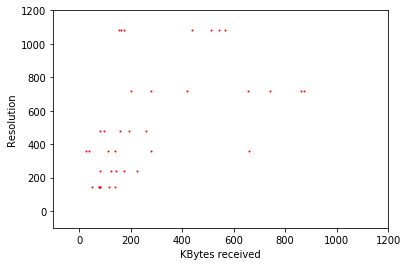

In [10]:
fig, ax = plt.subplots() # This creates just a canvas
ax.scatter(X_train,y_train,color='red',s=1) # ax is the actual figure

# Customize the plot
ax.set(xlim=[-100,1200], ylim=[-100,1200], ylabel="Resolution",
      xlabel="KBytes received")

# Save it to the disk
fig.savefig(my_path+'scatter.pdf')

Let's make a regression model "by hand".

In [0]:
my_slope = 1

# In order to plot a line, we need a set of values:
interval = np.array([-100,1200]).reshape(-1,1)
# We compute the prediction of our model
h_byhand = my_slope * interval

Let us add it to our plot

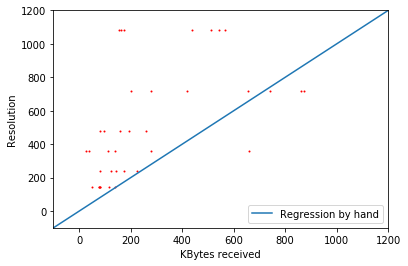

In [12]:
ax.plot(interval,h_byhand, label="Regression by hand")
ax.legend()


fig.savefig(my_path+'QoE-prediction-regr-byhand.pdf')

# Show the updated figure (source https://stackoverflow.com/a/36267710/2110769)
fig 

Try to find a better slope.

Let's train our first supervised learning model: an Ordinary Least Squares model.

In [0]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)

h_values = model.predict(interval)



Let's plot the new model

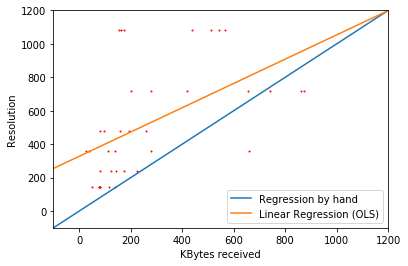

In [14]:
ax.plot(interval,h_values, label="Linear Regression (OLS)")
ax.legend()

fig.savefig(my_path+'QoE-prediction-OLS.pdf')
fig

In [15]:
print("theta_0 = ", model.intercept_, "; theta_1 = ", model.coef_)

theta_0 =  327.55577874520736 ; theta_1 =  [0.72611846]


## Multivariate model

In [0]:
features=['PacketsSent', 'KBytesReceived', 'BufferHealth']
all_cols = features.copy()

all_cols.append('Resolution')


In [17]:
df[all_cols]

,PacketsSent,KBytesReceived,BufferHealth,Resolution
0,6,36.199,10.241165,360
1,10,77.605,4.446780,144
2,14,75.432,3.989780,144
3,33,278.065,3.700462,360
4,6,27.840,4.512780,360
5,58,658.375,9.454706,360
6,14,77.429,4.606780,144
7,33,201.903,5.301853,720
8,18,172.740,3.638107,240
9,23,181.476,5.314732,240


In [18]:
X = df[features]
X_c = sm.add_constant(X)
y = df['Resolution']

model = sm.OLS(y,X_c).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Resolution   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     4.443
Date:                Tue, 03 Mar 2020   Prob (F-statistic):            0.00832
Time:                        17:44:30   Log-Likelihood:                -333.92
No. Observations:                  47   AIC:                             675.8
Df Residuals:                      43   BIC:                             683.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            282.8794    113.884      2.484      0.017      53.210     512.549
PacketsSent       -0.5551      5.828     -0.095      0.925     -12.308      11.198
KBytesReceived     0.5986      0.454      1.319      0.194      -0.317       1.514
BufferHealth      18.3779     19.149      0.960      0.343     -20.240      56.996
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.605
Skew:                           0.916   Prob(JB):                       0.0368
Kurtosis:                       2.871   Cond. No.                         859.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
features=['KBytesReceived']
all_cols = features.copy()

all_cols.append('Resolution')

X = df[features]
X_c = sm.add_constant(X)
y = df['Resolution']

model = sm.OLS(y,X_c).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Resolution   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     12.70
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           0.000881
Time:                        17:44:30   Log-Likelihood:                -334.43
No. Observations:                  47   AIC:                             672.9
Df Residuals:                      45   BIC:                             676.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            351.7606     67.000      5.250      0.000     216.815     486.706
KBytesReceived     0.7115      0.200      3.563      0.001       0.309       1.114
==============================================================================
Omnibus:                        6.717   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.743
Skew:                           0.922   Prob(JB):                       0.0343
Kurtosis:                       2.786   Cond. No.                         506.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df[all_cols]

,KBytesReceived,Resolution
0,36.199,360
1,77.605,144
2,75.432,144
3,278.065,360
4,27.840,360
5,658.375,360
6,77.429,144
7,201.903,720
8,172.740,240
9,181.476,240


# Introduce missing values

Let's set 10% of values to `NaN`

In [0]:
# From https://stackoverflow.com/a/39059033/2110769
df['BytesSent'] =  \
          df['BytesSent'].mask(np.random.random( len(df['BytesSent'] ) ) < .1)

In [0]:
df.to_csv('df.'+dataset_to_use+'_2.with_missing_values.csv', index=None,
          header=True)